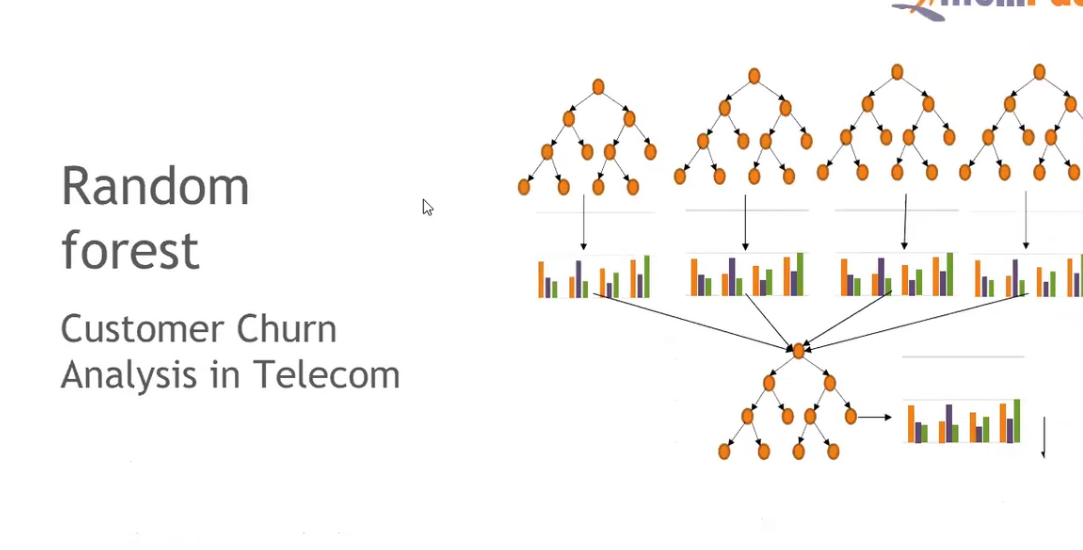

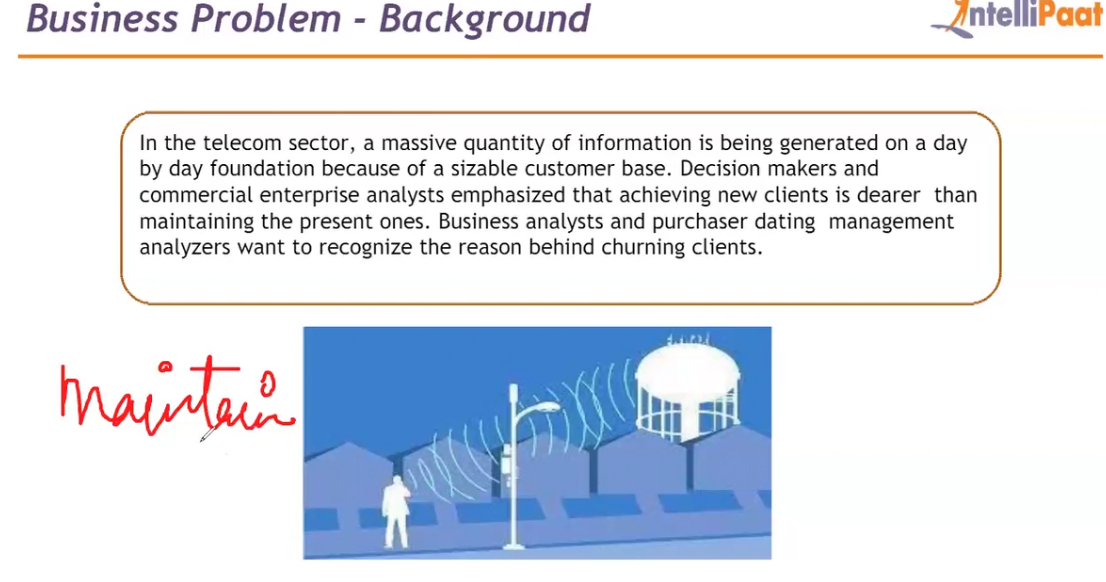

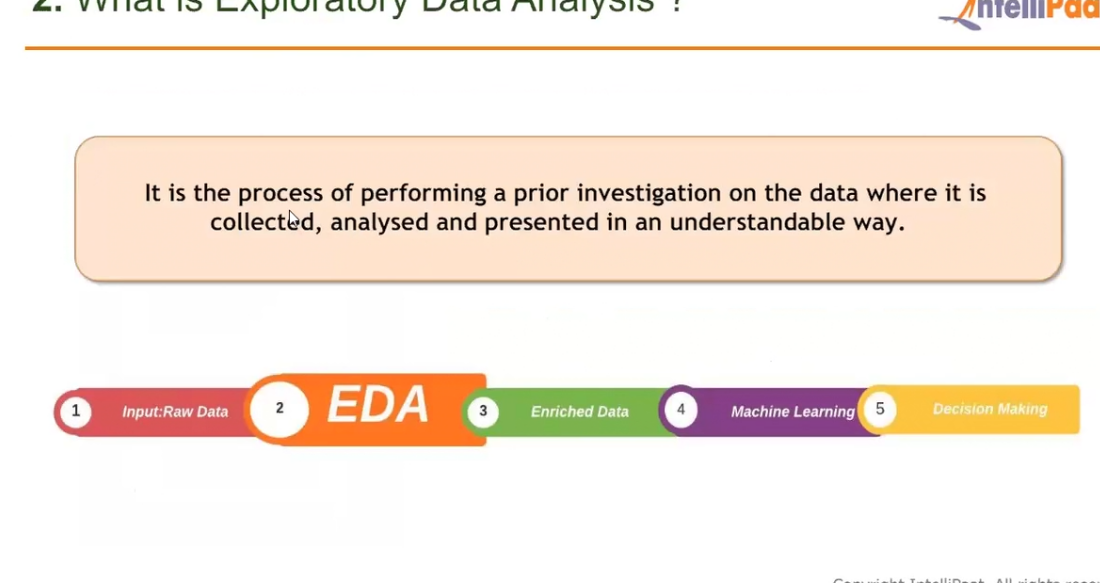

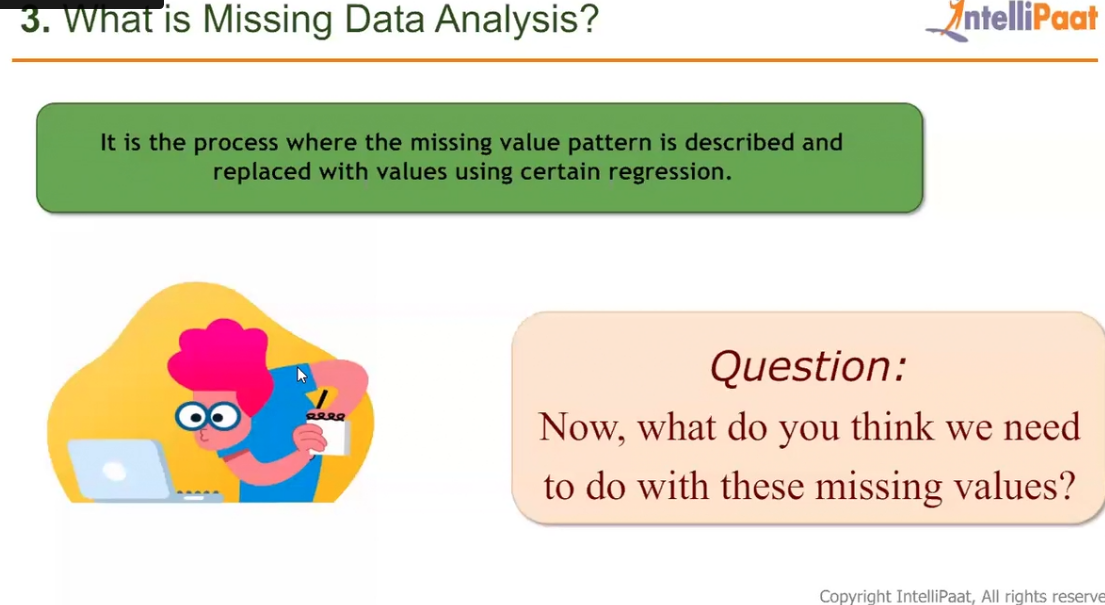

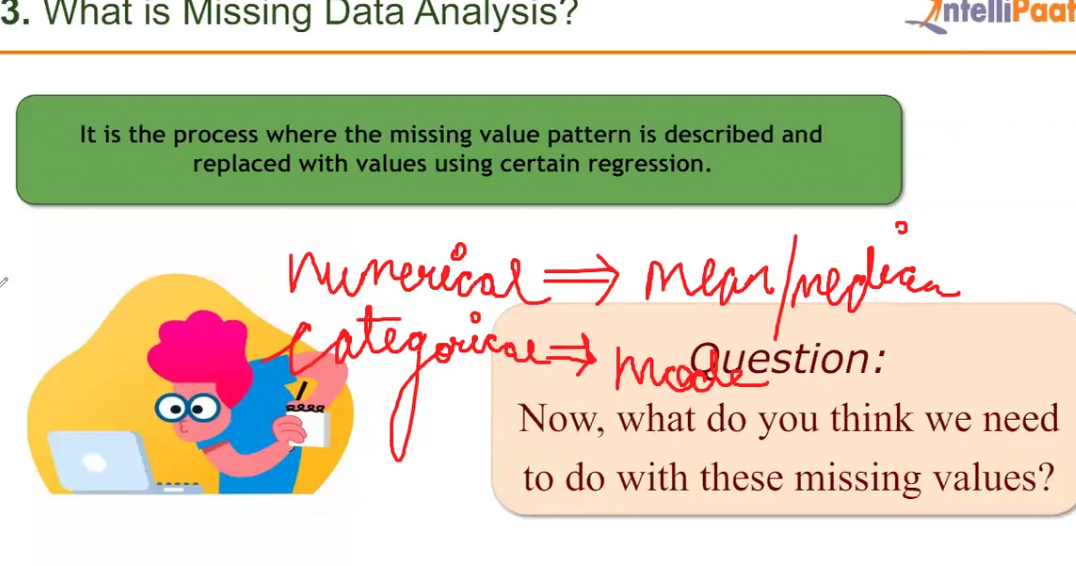

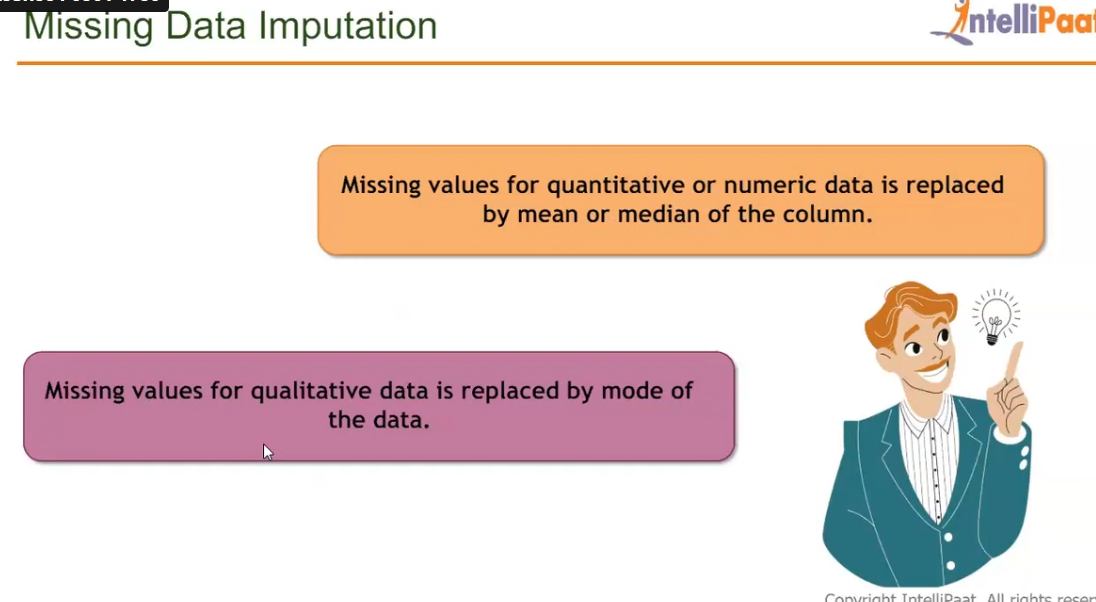

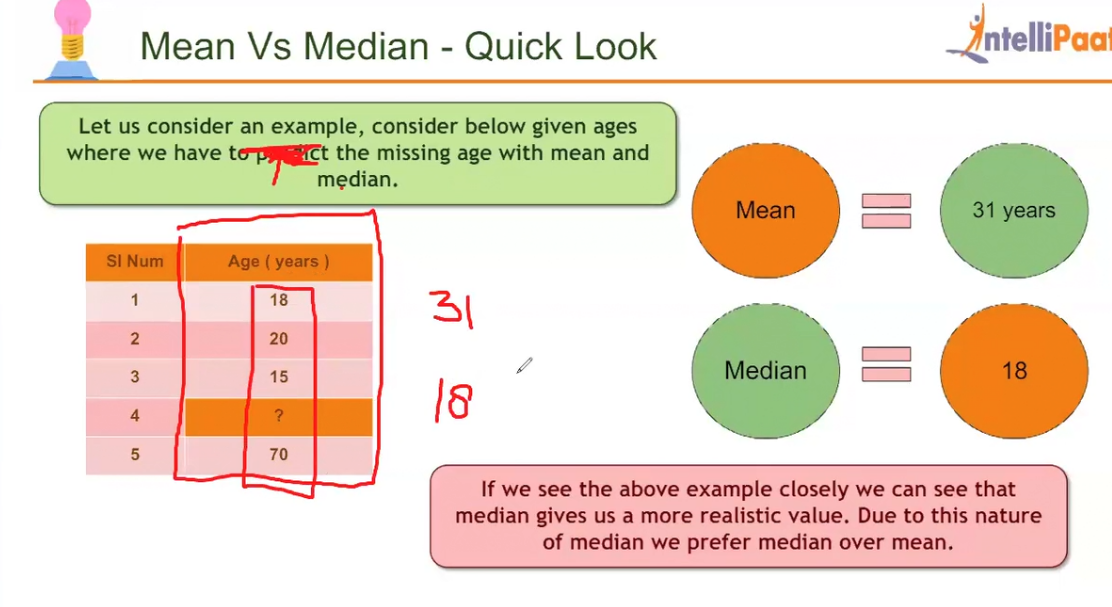

In [ ]:
#if the data is normally distributed we go with mean and if the data has outliers then we go with the median

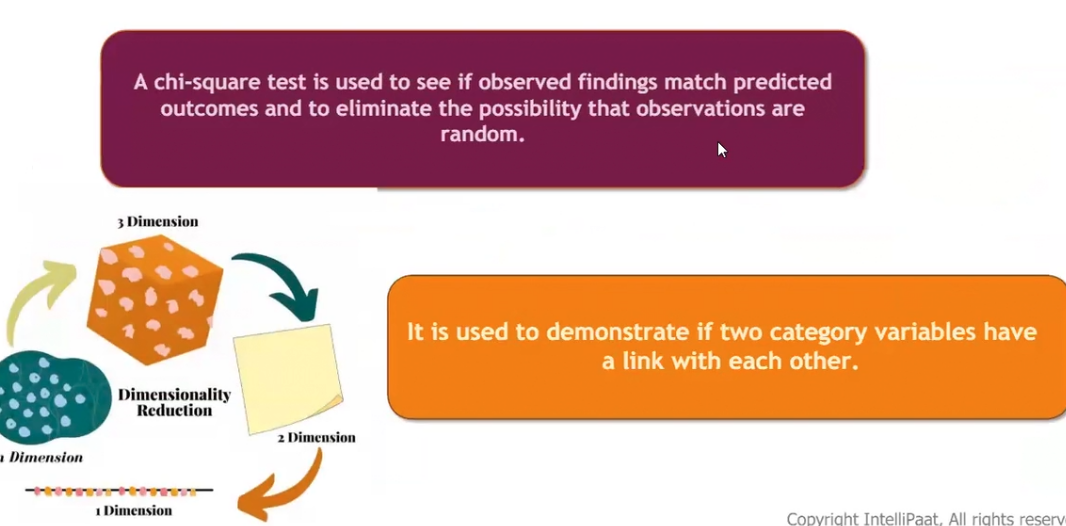

In [ ]:
#it simply remove those features that are less important,CHi square test is used to see the relationship between two categorial variables

In [ ]:
#2 types of chisquare test

In [ ]:
#1)Goodness of fit
#2)Test of Independance

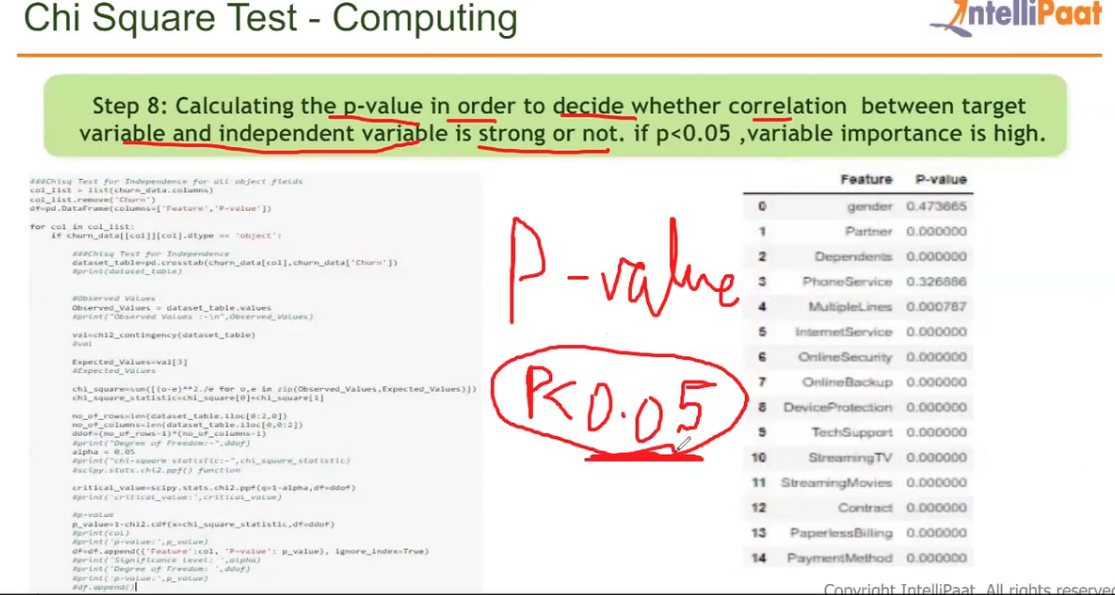

In [ ]:
#if P value is more than 0.05 ,we have to drop that column

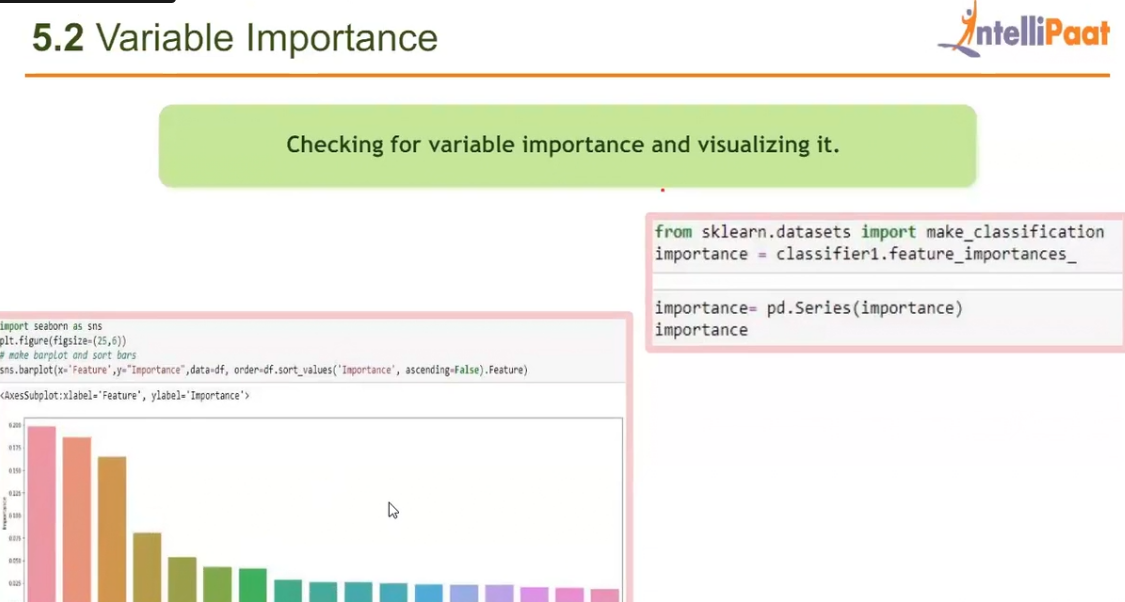

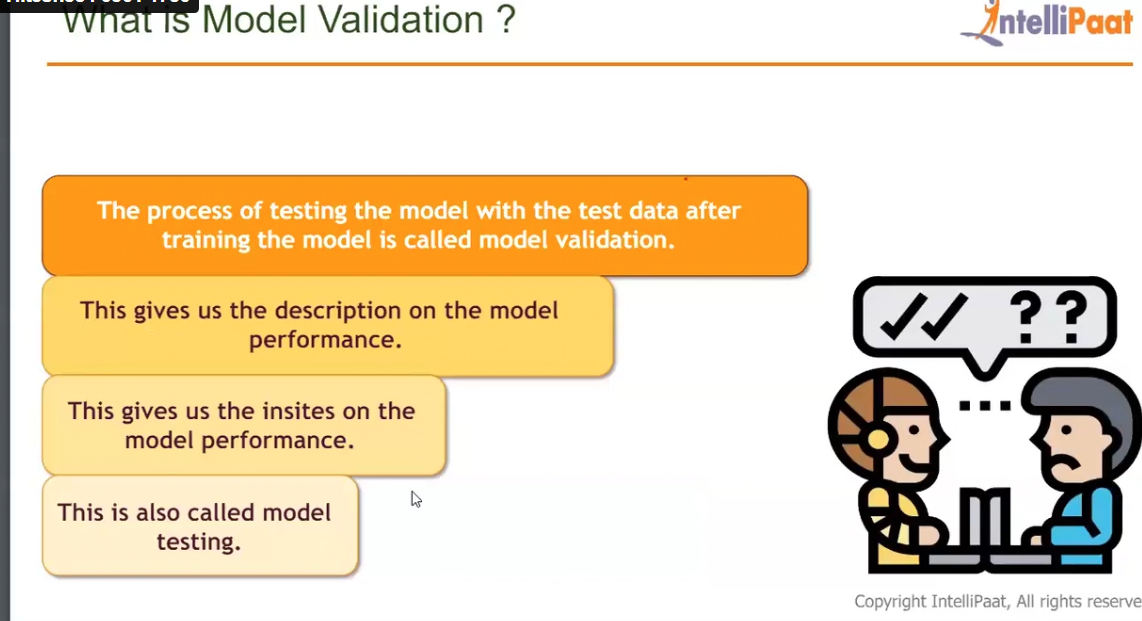

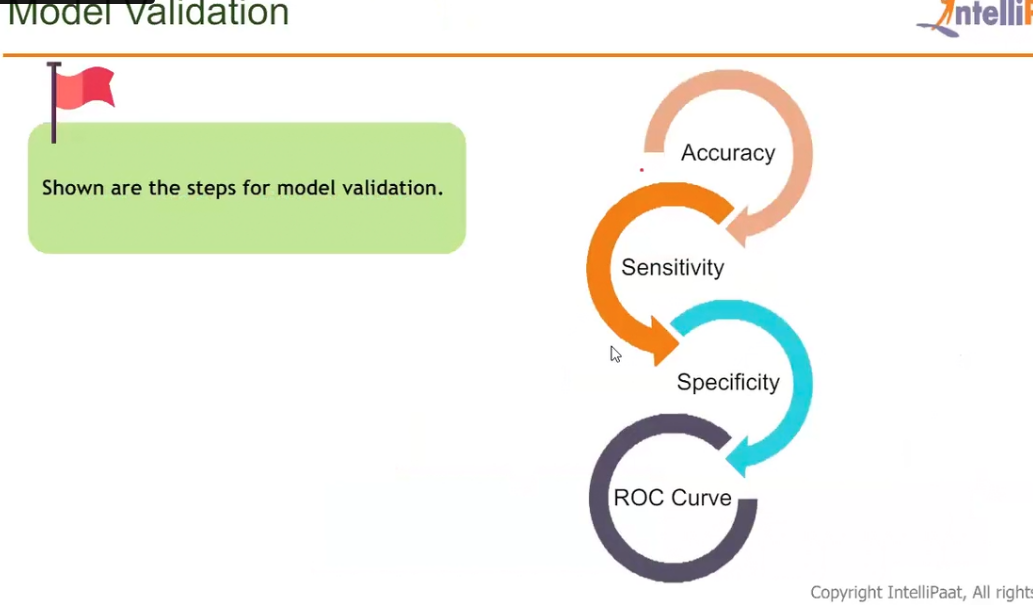

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('customer_churn (1).csv')

In [ ]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [ ]:
#if there are dependents on the customers side

In [ ]:
#tenure is months

In [ ]:
#phone Service is what services they used

In [ ]:
#we have multiple lines we can elate with the telephone lines

In [ ]:
#what type of internet service they used

In [ ]:
#Online security ,Device PRotection

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#these are the services whether they have opted or not

In [ ]:
#Tech support is whether they are looking for tech support or not
#what purpose they are using whether they are streaming movies or streaming T.V.

In [ ]:
#what is the contract amount

In [ ]:
#churn is the target variable which we need to classifiy

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Total Charges is not correct we have to make it numeric

In [ ]:
#changing the total charges data type to numeric

In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')#errors=coerce will treat any null value or empty value as numeric value

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#Missing Value Analysis

In [ ]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.shape

(7043, 21)

In [ ]:
#as we can see the output the total charges is having 11 null values,so we don't have appropriate null values so we will be dropping 11 null values rows in the same data table

In [ ]:
df.dropna(inplace=True) #to make the epramanent change in the runtime itself

In [ ]:
df=df.dropna()  #this code overwrites the existing dataset

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.shape

(7032, 21)

In [ ]:
#As customer_id is nowhere helping in the prediction also it's values are not appropriate to fit in the model we will be dropping the customer id column

In [ ]:
df.drop(columns=['customerID'],inplace=True)

In [ ]:
#lets see the descriptive stats of the dataset

In [ ]:
df.describe(include='all')

gender  SeniorCitizen Partner Dependents       tenure PhoneService  \
count    7032    7032.000000    7032       7032  7032.000000         7032   
unique      2            NaN       2          2          NaN            2   
top      Male            NaN      No         No          NaN          Yes   
freq     3549            NaN    3639       4933          NaN         6352   
mean      NaN       0.162400     NaN        NaN    32.421786          NaN   
std       NaN       0.368844     NaN        NaN    24.545260          NaN   
min       NaN       0.000000     NaN        NaN     1.000000          NaN   
25%       NaN       0.000000     NaN        NaN     9.000000          NaN   
50%       NaN       0.000000     NaN        NaN    29.000000          NaN   
75%       NaN       0.000000     NaN        NaN    55.000000          NaN   
max       NaN       1.000000     NaN        NaN    72.000000          NaN   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
count           7032            7032           7032         7032   
unique             3               3              3            3   
top               No     Fiber optic             No           No   
freq            3385            3096           3497         3087   
mean             NaN             NaN            NaN          NaN   
std              NaN             NaN            NaN          NaN   
min              NaN             NaN            NaN          NaN   
25%              NaN             NaN            NaN          NaN   
50%              NaN             NaN            NaN          NaN   
75%              NaN             NaN            NaN          NaN   
max              NaN             NaN            NaN          NaN   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7032        7032        7032            7032   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3094        3472        2809            2781   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod  MonthlyCharges  \
count             7032             7032              7032     7032.000000   
unique               3                2                 4             NaN   
top     Month-to-month              Yes  Electronic check             NaN   
freq              3875             4168              2365             NaN   
mean               NaN              NaN               NaN       64.798208   
std                NaN              NaN               NaN       30.085974   
min                NaN              NaN               NaN       18.250000   
25%                NaN              NaN               NaN       35.587500   
50%                NaN              NaN               NaN       70.350000   
75%                NaN              NaN               NaN       89.862500   
max                NaN              NaN               NaN      118.750000   

        TotalCharges Churn  
count    7032.000000  7032  
unique           NaN     2  
top              NaN    No  
freq             NaN  5163  
mean     2283.300441   NaN  
std      2266.771362   NaN  
min        18.800000   NaN  
25%       401.450000   NaN  
50%      1397.475000   NaN  
75%      3794.737500   NaN  
max      8684.800000   NaN

In [ ]:
#Nan because the values are categorical

In [ ]:
#inPhoneService out of 7032 6352 have opted for Phone Service as Yes

In [ ]:
#Maximum Monthly charges is this ,minimum is this

**Feature Selection**

We are going to implement chi-square test to select the relevant features

Chi-Square test is normally done on Categorical data(object) ,where we will select each independent attribute and calculating chi-Square statistics value with the help of observed value and expected value.

if observed and expected values are close then we'll have high chi-square statistics.(high chi-square stats implies attributes are highly independent) if observed and expected values are far then we'll have less chi-square statistics.(less chi-square stats implies attributes are not independent)

With the above concept we'll set null and alternative hypothesis and check for its acceptance or rejection through p-value and alpha value (significance value)

if p -value > alpha value ,we reject null hypothesis

if p-value < alpha value ,we accept null hypothesis

The p-value should be less than 0.05 for the feature acceptance.

In [ ]:
from scipy.stats import chisquare
import scipy.stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming churn_data is your DataFrame
col_list = list(df.columns)
col_list.remove('Churn')
results = []

for col in col_list:
    if  df[col].dtype == 'object':
        # Chi-Square Test for Independence
        dataset_table = pd.crosstab(df[col], df['Churn'])           #we are checking the test of independance between independant columns or dependant columns

        # Perform the Chi-Square test
        chi2, p, dof, ex = chi2_contingency(dataset_table)

        # Collect the results
        results.append({'Feature': col, 'P-value': p})

# Create a DataFrame from the results
fg = pd.DataFrame(results)

fg

Feature        P-value
0             gender   4.904885e-01
1            Partner   3.973798e-36
2         Dependents   2.019659e-42
3       PhoneService   3.499240e-01
4      MultipleLines   3.567927e-03
5    InternetService  5.831199e-159
6     OnlineSecurity  1.400687e-184
7       OnlineBackup  7.776099e-131
8   DeviceProtection  1.959389e-121
9        TechSupport  7.407808e-180
10       StreamingTV   1.324641e-81
11   StreamingMovies   5.353560e-82
12          Contract  7.326182e-257
13  PaperlessBilling   8.236203e-58
14     PaymentMethod  1.426310e-139

In [ ]:
fg['P-value']=fg['P-value'].apply(lambda x:'{:.6f}'.format(x))

In [ ]:
fg

Feature   P-value
0             gender  0.490488
1            Partner  0.000000
2         Dependents  0.000000
3       PhoneService  0.349924
4      MultipleLines  0.003568
5    InternetService  0.000000
6     OnlineSecurity  0.000000
7       OnlineBackup  0.000000
8   DeviceProtection  0.000000
9        TechSupport  0.000000
10       StreamingTV  0.000000
11   StreamingMovies  0.000000
12          Contract  0.000000
13  PaperlessBilling  0.000000
14     PaymentMethod  0.000000

From the above output as the P-value for gender and PhoneService is greater than critical value ,we'll dropping those columns and only considering the relavant columns

In [ ]:
df.drop(columns=['gender'],inplace=True)

In [ ]:
df.drop(columns=['PhoneService'],inplace=True)

In [ ]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

From the above above feature selection we have selected only relavant feature columns and removed the irrelavant columns.
So columns before
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

  in total 22 columns
  Columns after chi-Square Analysis:
  Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')
 #   reduced to 19 columns
 #2 irrelavant columns are dropped['gender ,phone Service] and customer id is dropped because customer_id datatype  will give error while fitting the data

  df.columns








In [ ]:
#Label Encoding

Encoding all the labels as numerical categories as because this kind of string data cannot be used to fit as these are incomaptible type of fit the classification model this can be performed through label_encoder or using the map function

In [ ]:
df.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
#A lot of columns are object data types .If there are multiple labels we would go through one hot encoding

In [ ]:
#LABEL encoding can be done with the help of label encoder class of sklearn

In [ ]:
gols=list(df.columns)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for i in gols:
  if df[i].dtypes=='object':
    df[i]=le.fit_transform(df[i])

In [ ]:
df.head()

SeniorCitizen  Partner  Dependents  tenure  MultipleLines  InternetService  \
0              0        1           0       1              1                0   
1              0        0           0      34              0                0   
2              0        0           0       2              0                0   
3              0        0           0      45              1                0   
4              0        0           0       2              0                1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             2                 0            0            0   
1               2             0                 2            0            0   
2               2             2                 0            0            0   
3               2             0                 2            2            0   
4               0             0                 0            0            0   

   StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
0                0         0                 1              2           29.85   
1                0         1                 0              3           56.95   
2                0         0                 1              3           53.85   
3                0         1                 0              0           42.30   
4                0         0                 1              2           70.70   

   TotalCharges  Churn  
0         29.85      0  
1       1889.50      0  
2        108.15      1  
3       1840.75      0  
4        151.65      1

In [ ]:
df.dtypes

NameError: name 'df' is not defined

**Model Building**

In [ ]:
X=df.drop("Churn",axis=1)
y=df.iloc[:,-1]

In [ ]:
X

SeniorCitizen  Partner  Dependents  tenure  MultipleLines  \
0                 0        1           0       1              1   
1                 0        0           0      34              0   
2                 0        0           0       2              0   
3                 0        0           0      45              1   
4                 0        0           0       2              0   
...             ...      ...         ...     ...            ...   
7038              0        1           1      24              2   
7039              0        1           1      72              2   
7040              0        1           1      11              1   
7041              1        1           0       4              2   
7042              0        0           0      66              0   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                   0               0             2                 0   
1                   0               2             0                 2   
2                   0               2             2                 0   
3                   0               2             0                 2   
4                   1               0             0                 0   
...               ...             ...           ...               ...   
7038                0               2             0                 2   
7039                1               0             2                 2   
7040                0               2             0                 0   
7041                1               0             0                 0   
7042                1               2             0                 2   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0               0            0                0         0                 1   
1               0            0                0         1                 0   
2               0            0                0         0                 1   
3               2            0                0         1                 0   
4               0            0                0         0                 1   
...           ...          ...              ...       ...               ...   
7038            2            2                2         1                 1   
7039            0            2                2         1                 1   
7040            0            0                0         0                 1   
7041            0            0                0         0                 1   
7042            2            2                2         2                 1   

      PaymentMethod  MonthlyCharges  TotalCharges  
0                 2           29.85         29.85  
1                 3           56.95       1889.50  
2                 3           53.85        108.15  
3                 0           42.30       1840.75  
4                 2           70.70        151.65  
...             ...             ...           ...  
7038              3           84.80       1990.50  
7039              1          103.20       7362.90  
7040              2           29.60        346.45  
7041              3           74.40        306.60  
7042              0          105.65       6844.50  

[7032 rows x 17 columns]

In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

**Splitting the data into train and test data as train data will be used for training the model and test data is for prediction**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [ ]:
#Now we will train the model on training set

In [ ]:
X_train=np.array(X_train)

In [ ]:
y_train=np.array(y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=100,random_state=45)  #n_estimator is the number of decision trees
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=45)

In [ ]:
rf1=rf.fit(X_train,y_train)

In [ ]:
y_pred=rf1.predict(X_test)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
accuracy_score(y_pred,y_test)

0.7775408670931059

In [ ]:
#From the above accuracy we can infer that the model is having 78.39% accuracy that is out of 100 predictions we'll be getting 78 predictions as true prediction

##HyperParameter Tuning

**n_estimators:nuber of decision tress to choose  while fitting the random forest model**

*   min_samples_split:parameter that tells the decision trees in a random forest that minimum required number of decision trees in any given node in order to split it
*   min_smaples_leaf:THis Random Forest Hyperparameter  specifies the minimum number of samples that should be present in the leaf node after splitting a node

*   max_depth :THe max_depth in a decission tree is defined as the longest path between the root node and leaf_node
*  max_sample:THe  max_smaple hyperparameter  determines what fraction of the original dataset  is given to any individual tree

*   max_features :This resembles the number of maximum features provided to each tree in a random forest


*   max_samples_leaf:The max_sample hyperparameter determines what fraction of original dataset is given to any individual tree
*   List item











There are two techniques for hyperparameter tuning

*   Randomised SearchCV
*   Grid Search CV






In [ ]:
#For our model we will be implementing RandomisedSeachCv method and tune our model

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#Number of trees in random Forest
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
#number of features to consider at every split
max_features=['auto','sqrt']
#maximum number of levels in tree
max_depth= [int(x) for x in np.linspace(10,110,num=11)]  #10,20,30,40,50,60,70,80,90,100,110
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split=[2,5,10]
#Minimum number of samples required at each node
min_samples_leaf=[1,2,4]#range is  4-1 ,1.5,2,2.5
#Method of selecting samples for traning each tree
bootstrap=[True,False]
#Create the random grid
random_grid={'n_estimators':n_estimators,
             'max_features': max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
              'bootstrap':bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=42)

In [ ]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=1,
                      scoring="neg_mean_absolute_error",cv=2,verbose=2,random_state=42,n_jobs=-1,return_train_score=True)

In [ ]:
#optimal value should be less or very small

In [ ]:
#cv is used to evaluate the model performance by training the data to set of validation sets

In [ ]:
#it basically controls the verbosity of output

In [ ]:
#A higher number means more detail messages

In [ ]:
#it basically processes all the available cpu scores so as to validate the search

In [ ]:
#if return train_score is true then the training score will be included in the results

In [ ]:
rf2=rf_random.fit(X_train,y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


In [ ]:
rf2.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [ ]:
y_pred=rf2.predict(X_test)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
accuracy_score(y_test,y_pred)

0.7796730632551528

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1021
           1       0.64      0.46      0.53       386

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407

